# Implementing linear regression using python (from scratch).

Installing necessary packages

In [77]:
!pip install -r requirement.txt

In [78]:
import csv
import io
import base64
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [79]:
plt.style.use('ggplot')

In [80]:
%matplotlib inline

Loading data

In [81]:
csv_file = open('ex1data1.txt')
data = np.array(list(csv.reader(csv_file, delimiter=','))).astype(np.float)

In [82]:
x = data[:, 0]
y = data[:, 1]
# normalisation
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]

In [83]:
# Step size
alpha = 0.01
# No. of iterations
iterations = 1500
# No. of data points
m = y.size
# Set the seed
np.random.seed(123)
# Pick some random values to start with
theta = np.random.rand(2)

### GRADIENT DESCENT

In [84]:
# GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

In [85]:
# Pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

# Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 5.84, 4.59


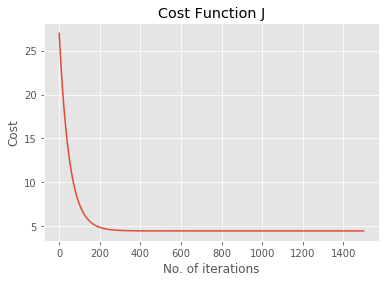

In [86]:
# Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

### Animation

In [87]:
# Animation
# Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

### Generate the animation data

In [88]:
# Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

### Animation function.  This is called sequentially

In [89]:
# Animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

In [90]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


### Display the animation


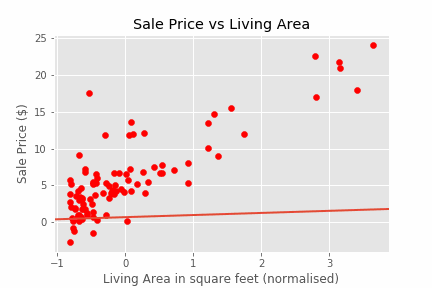

In [95]:
# Display the animation...
filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

### Test of our prediction model

##### Predict values for population sizes of 35,000 and 70,000

In [92]:
predict1 = [1, 35000]@theta
predict1

160762.23604255213

In [93]:
predict2 = [1, 70000]@theta
predict2

321518.6329515115

In [94]:
csv_file.close()

#### By El Houcine ES SANHAJI

# Thank you